# UIExtraction Part1: Extract

 * @Author: NPU-Franklin 
 * @Date: 2020-01-30 16:32:06 
 * @Last Modified by: NPU-Franklin 
 * @Last Modified time: 2020-02-01 01:32:06 

Designed to extract the most valuable features from images using autoencoder(AE).

## 1. Importing

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

from scipy import *
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, AveragePooling2D, UpSampling2D
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
print("keras_version: "+keras.__version__)
print("Tensorflow_version: "+tensorflow.__version__)

keras_version: 2.2.4-tf
Tensorflow_version: 2.0.0


## 2. Configuration

### Set font size, figure size and the gpu device CUDA using.

In [3]:
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (18,24)

os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'

## 3. Load and preprocess images

### Define basic information of images.

In [4]:
img_width, img_height, channels = 1536, 2048, 3
input_shape = (img_height, img_width, channels)

### Define load_data function.

In [5]:
def load_data():
    dir = '../datasets'
    files = ["%s/%s" % (dir, num) for num in os.listdir(dir)]
    arr = np.empty((len(files), img_height, img_width, channels), dtype=np.float64)
    for i, imgfile in enumerate(files):
        img = load_img(imgfile)
        x = img_to_array(img).reshape(img_height, img_width, channels)
        x = x.astype('float64')/255
        arr[i] = x
    return arr

### Load data.

In [6]:
train_data = load_data()
print(train_data.shape)

(17, 2048, 1536, 3)


### Plot an image of the dataset.

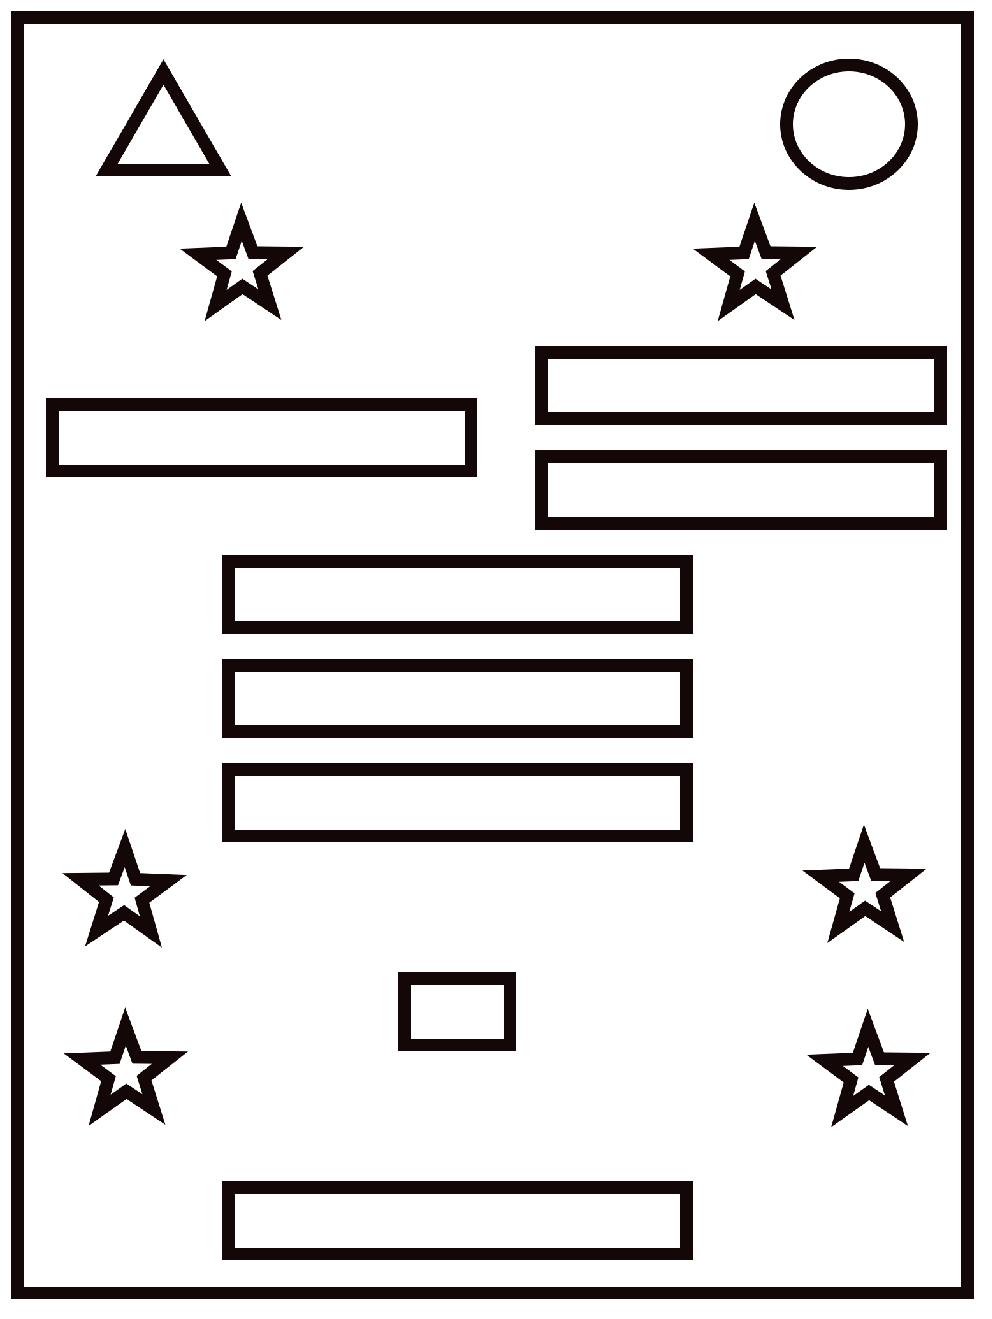

In [7]:
plt.imshow(train_data[0])
plt.axis('off')
plt.show()

### Save the data as numpy format for future using.

In [8]:
np.save('../data_numpyarray/dataset.npy', train_data)

## 4. Build and compile the model

In [9]:
model = Sequential()

### Encoder part

In [10]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

### Decoder part

In [11]:
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same'))

### Compile

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Summary

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2048, 1536, 32)    896       
_________________________________________________________________
average_pooling2d_1 (Average (None, 1024, 768, 32)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1024, 768, 16)     4624      
_________________________________________________________________
average_pooling2d_2 (Average (None, 512, 384, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 512, 384, 8)       1160      
_________________________________________________________________
average_pooling2d_3 (Average (None, 256, 192, 8)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 192, 4)      

## 5. Training

In [14]:
model.fit(train_data, train_data, epochs=100, shuffle=True)

Epoch 1/100


## 6. Save the model

In [0]:
model.save('../results/model/CAE.h5')